# CDS503 - Machine Learning Final Project

Universiti Sains Malaysia

Semester 2, Academic Session 2019/2020


Group 6 - **Data Masters**

Members:
- Lee Yong Meng
- Lee Kar Choon
- Tan Wei Chean
- Yee Hoong Yip

## Overview

- [Data Preparation](#Data-Preparation)
- [Experiment Set 1: Machine Learning Algorithm](#Experiment-Set-1:-Comparing-Machine-Learning-Algorithms)
- [Experiment Set 2: Feature Selection](#Experiment-Set-2:-Feature-Selection)
- [Experiment Set 3: Ensemble Learning](#Experiment-Set-3:-Ensemble-Learning)
- [Experiment Set 4: Training Sample Size](#Experiment-Set-4:-Vary-Training-Sample-Size)

# Data Preparation

Before working on the experiment sets, we need to import some necessary libraries for working on data pre-processing and conducting experiment sets.

In [1]:
# Standard Python libraries
import pandas as pd                  # Use pandas.DataFrame to manipulate data
import matplotlib.pyplot as plt      # Standard plotting library

# Data preprocessing
from sklearn import preprocessing    # Data preprocessing

# Model selection - split data, cv, model evaluation
from sklearn.model_selection import train_test_split    # Split dataset into training and test sets
from sklearn.model_selection import cross_val_score     # k-fold cross-validation
from sklearn.model_selection import GridSearchCV        # search for best parameters
from sklearn import metrics                             # metrics to evaluate the model performance
from sklearn.metrics import classification_report, confusion_matrix    # analyze prediction made by the classification model

# Machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

# Feature extraction - Decomposition
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

# Ensemble learning methods
from sklearn.ensemble import BaggingClassifier            # Bagging - (B)ootstrap (AGG)regat(ING)
from sklearn.ensemble import AdaBoostClassifier           # Boosting - (ADA)ptive (BOOST)ing
from sklearn.ensemble import VotingClassifier             # Voting

# Itertools - here, used to generate combinations of base classifiers for voting
import itertools

In [2]:
# Silence all warnings during training and evaluation process
import warnings
warnings.filterwarnings("ignore")

### Click [here](#Start-Here-To-Skip-Data-Preprocessing-Step) to skip the preprocessing steps.

## Reading CSV file

Next, we read in the data from the CSV file: AppleStore.csv

In [3]:
# Read in data
df = pd.read_csv('AppleStore.csv')

# Quick view on the data
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


Several columns in the datasets are not helpful in our work. Therefore, we will remove these columns.

- `Id`: App ID
- `track_name`: App name
- `currency`: not helpful because it only has one unique value "USD" for all examples.
- Unnamed: the first column, which is the count of the record.

We use the method `.drop()` to remove the specified columns.

In [4]:
# Define columns to drop
columns_drop = ['id', 'track_name', 'currency']

# Drop columns from list
df.drop(columns_drop, axis = 1, inplace = True)
# Drop unnamed column
df.drop(df.columns[df.columns.str.contains('unnamed', case = False)], 
        axis = 1, inplace = True)

df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,128512000,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


## Grouping `user_rating` using `pd.cut()` 

For our business problem, we would like to group the column `user_rating` (i.e. our target column) into three groups, namely "Low", "Medium" and "High". We use the function `pd.cut()` to perform the binning. Then, we add a new column `user_rating_label` into the data frame, which will be shown at the very end when the data frame preview is scrolling horizontally.

In [5]:
df['user_rating_label'] = pd.cut(df['user_rating'], bins = 3, labels = ['Low', 'Medium', 'High'])
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,user_rating_label
0,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,High
1,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,High
2,100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,High
3,128512000,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,High
4,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,High


Next, we will drop the column `user_rating` because it is no longer needed - we will be using the new column `user_rating_label` as the target of classification.

In [6]:
# Drop column: user_rating
df.drop('user_rating', axis = 1, inplace = True)
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,user_rating_label
0,100788224,3.99,21292,26,4.5,6.3.5,4+,Games,38,5,10,1,High
1,158578688,0.00,161065,26,3.5,8.2.2,4+,Productivity,37,5,23,1,High
2,100524032,0.00,188583,2822,4.5,5.0.0,4+,Weather,37,5,3,1,High
3,128512000,0.00,262241,649,4.5,5.10.0,12+,Shopping,37,5,9,1,High
4,92774400,0.00,985920,5320,5.0,7.5.1,4+,Reference,37,5,45,1,High


We further inspect the data by calling the method `.info()`

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 13 columns):
size_bytes           7197 non-null int64
price                7197 non-null float64
rating_count_tot     7197 non-null int64
rating_count_ver     7197 non-null int64
user_rating_ver      7197 non-null float64
ver                  7197 non-null object
cont_rating          7197 non-null object
prime_genre          7197 non-null object
sup_devices.num      7197 non-null int64
ipadSc_urls.num      7197 non-null int64
lang.num             7197 non-null int64
vpp_lic              7197 non-null int64
user_rating_label    7197 non-null category
dtypes: category(1), float64(2), int64(7), object(3)
memory usage: 682.0+ KB


We see that there is no missing values in our data.

Some of the columns contain `String` values which might not be compatible to certain machine learning algorithms that will be implemented in the subsequent sections. Therefore, we need to transform the data into labels encoded by numeric values (i.e., 0, 1, 2, ...).

## Label Encoding - Categorical Attributes

We use `sklearn.preprocessing.LabelEncoder()` to transform the following columns into numeric labels:
- `prime_genre`: contains 22 unique `String` values.
- `user_rating_label`: contains 3 unique `String` values ("Low", "Medium", "High")
- `cont_rating`: app content rating, contains 4 unique `String` values.
- `ver`: app version, contains 1590 unique `String` values.

In [8]:
# from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Define names of columns selected for label encoding
col_categories = ["cont_rating", "prime_genre", "user_rating_label", "ver"]
col_num_unique_values = dict()

for col_name in col_categories:
    count = len(df[col_name].unique())
    col_num_unique_values[col_name] = count
    
    print("There are {} unique values of {}.".format(count, col_name))
    
    df[col_name] = le.fit_transform(df[col_name])
    df[col_name] = df[col_name].astype(str)

print()

df.info()

There are 4 unique values of cont_rating.
There are 23 unique values of prime_genre.
There are 3 unique values of user_rating_label.
There are 1590 unique values of ver.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 13 columns):
size_bytes           7197 non-null int64
price                7197 non-null float64
rating_count_tot     7197 non-null int64
rating_count_ver     7197 non-null int64
user_rating_ver      7197 non-null float64
ver                  7197 non-null object
cont_rating          7197 non-null object
prime_genre          7197 non-null object
sup_devices.num      7197 non-null int64
ipadSc_urls.num      7197 non-null int64
lang.num             7197 non-null int64
vpp_lic              7197 non-null int64
user_rating_label    7197 non-null object
dtypes: float64(2), int64(7), object(4)
memory usage: 731.1+ KB


In [9]:
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,user_rating_label
0,100788224,3.99,21292,26,4.5,1379,2,7,38,5,10,1,0
1,158578688,0.00,161065,26,3.5,1514,2,15,37,5,23,1,0
2,100524032,0.00,188583,2822,4.5,1210,2,22,37,5,3,1,0
3,128512000,0.00,262241,649,4.5,1236,0,17,37,5,9,1,0
4,92774400,0.00,985920,5320,5.0,1472,2,16,37,5,45,1,0


Then, the preprocessed dataset is saved into a new CSV file. This is the dataset used for conducting the experiment sets.

In [10]:
# df.to_csv(r'AppleStore_preprocessed.csv', index = False, header = True)

## Start Here To Skip Data Preprocessing Step

In [11]:
df = pd.read_csv('AppleStore_preprocessed.csv')
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,user_rating_label
0,100788224,3.99,21292,26,4.5,1379,2,7,38,5,10,1,0
1,158578688,0.00,161065,26,3.5,1514,2,15,37,5,23,1,0
2,100524032,0.00,188583,2822,4.5,1210,2,22,37,5,3,1,0
3,128512000,0.00,262241,649,4.5,1236,0,17,37,5,9,1,0
4,92774400,0.00,985920,5320,5.0,1472,2,16,37,5,45,1,0


## Defining Target and Features and Splitting Dataset

The attribute `user_rating_label` is the target throught the experiment sets. At this stage, all the other attributes are selected as the features used for predicting the `user_rating_label` to this classification problem.

In [12]:
# Target - `user_rating_label`
target = df['user_rating_label']

# Feature - all other attributes
features = df.drop('user_rating_label', axis = 1)

Finally, the dataset is split into training and test sets, with proportions of 80% and 20% respectively.

The parameter `random_state=0` is specified.

In [13]:
# Split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.2, random_state=0)

Define a helper function to train and evaluate model performance. This function includes a 10-fold cross-validation.

The performance metric is `"f1_macro"`.

In [14]:
# Helper function #1: train and evaluate model performance.
# - The parameter `estimator` takes a list of classifier dictionary: {name, classifier}
def train_and_evaluate(estimators, X_train, X_test, Y_train, Y_test):
    # Nested function #1: Specify performance metric: only "f1_macro"
    def get_scoring_metric():
        return ['f1_macro']
    
    # Nested function #2: K-fold cross validation
    def print_validation_performance(estimator, X_train, Y_train, name=None, cv=10):
        for metric in get_scoring_metric():
            scores = cross_val_score(estimator, X_train, Y_train, cv=cv, scoring=metric)
            estimator_name = ""
            
            if name is not None:
                estimator_name = " {}".format(name)
                
            print("{} (Validation{}) = ".format(metric, estimator_name), end="")
            print("{:.4f}".format(scores.mean()))
    
    # Nested function #3: Training and testing
    def print_test_performance(estimator, X_train, X_test, Y_train, Y_test, name=None):
        estimator.fit(X_train, Y_train)
        test_predict = estimator.predict(X_test)
        
        dict_score = {}
        
        # Get performance score for each metric
        for metric in get_scoring_metric():
            estimator_name = ""
            score = 0.0
            
            if name is not None:
                estimator_name = " {}".format(name) 
            
            average = None
            acc_flag = True
            
            if "macro" in metric:
                average = "macro"
                acc_flag = False
            elif "weighted" in metric:
                average = "weighted"
                acc_flag = False
            
            print("{} (Test{}) = ".format(metric, estimator_name), end="")
            
            # Currently only supports accuracy and f1_score.
            if acc_flag:
                score = metrics.accuracy_score(Y_test, test_predict)
            else:
                score = metrics.f1_score(Y_test, test_predict, average=average)
            
            print("{:.4f}".format(score))
            
            dict_score[metric] = score
        
        print(confusion_matrix(Y_test, test_predict))         # Confusion matrix
        print(classification_report(Y_test, test_predict))    # Classification report
        
        return dict_score
    
    dict_est_score = {}
    
    # Print validation and test performance for all classifiers in the list.
    for key_est in estimators:
        print_validation_performance(estimators[key_est], X_train, Y_train, name=key_est)
        dict_est_score[key_est] = print_test_performance(estimators[key_est], 
                                                         X_train, X_test, Y_train, Y_test, 
                                                         name=key_est)
        print()
        
    return dict_est_score

Now that we are ready to conduct the experiment sets.

# Experiment Set 1: Comparing Machine Learning Algorithms

In this experiment set, we compare the baseline performance and the best performance (after parameter tuning) on the test set for each machine learning algorithm being used.

The list of machine learning algorithms are:

- K-Nearest Neighbors
- Decision Tree
- Linear SVM
- Polynomial SVM
- RBF SVM
- Sigmoid SVM

Before starting the experiment set, a helper function is defined to identify the best set of parameters for a machine learning model for this dataset.

In [15]:
# Helper function #2 - Get the best parameter set for a classifier
# using GridSearchCV()
def get_best_parameter_set(estimator, param_grid, scoring):
    # Fit on the dataset on all parameter combinations in param_grid
    # Retain the best combination
    grid_search = GridSearchCV(estimator, param_grid, cv=10, scoring=scoring) #f1_macro
    grid_result = grid_search.fit(x_train, y_train)
    
    return grid_result.best_params_

## 1.1 K-Nearest Neighbors

Train and evaluate a KNN classifier using the training and test set using helper function \#1: `train_and_evaluate()`.

In [16]:
# Train and evaluate test performance of a baseline KNN classifier
estimator = {"KNN - baseline": KNeighborsClassifier()}

train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation KNN - baseline) = 0.3262
f1_macro (Test KNN - baseline) = 0.3329
[[1062   30   10]
 [ 176   11    2]
 [ 141    4    4]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1102
           1       0.24      0.06      0.09       189
           2       0.25      0.03      0.05       149

    accuracy                           0.75      1440
   macro avg       0.42      0.35      0.33      1440
weighted avg       0.65      0.75      0.67      1440




{'KNN - baseline': {'f1_macro': 0.3328694504027031}}

Call helper function \#2: `get_best_parameter_set()` to obtain the best parameter set for a KNN classifier to this dataset.

In [17]:
# Find the best parameter set for KNN Classifier for the dataset
# - Specify range of parameter values to find the best parameter set.
param_grid = {'n_neighbors': range(2, 20)}

# - Call helper function #2: get_best_parameter_set which returns the best parameter set
#   for KNN classifier.
best_param_set = get_best_parameter_set(KNeighborsClassifier(), param_grid, scoring='f1_macro')
best_param_set

{'n_neighbors': 3}

Define new KNN classifier with the best parameter set, repeat the training and evaluation process to generate test performance for comparison with the baseline performance.

In [18]:
# Train and evaluate test performance of a KNN classifier with the best parameter set
estimator = {"KNN - best parameter": KNeighborsClassifier(**best_param_set)}

train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation KNN - best parameter) = 0.3395
f1_macro (Test KNN - best parameter) = 0.3424
[[1017   54   31]
 [ 162   18    9]
 [ 137    7    5]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1102
           1       0.23      0.10      0.13       189
           2       0.11      0.03      0.05       149

    accuracy                           0.72      1440
   macro avg       0.37      0.35      0.34      1440
weighted avg       0.63      0.72      0.67      1440




{'KNN - best parameter': {'f1_macro': 0.34235527231968366}}

The similar process is repeated for the other machine learning algorithms.

## 1.2 Decision Trees

**Note**: The parameter `random_state=0` is specified for both baseline and the best performing classifiers.

In [19]:
# Train and evaluate test performance of a baseline Decision Tree classifier
estimator = {"Decision Tree - baseline": DecisionTreeClassifier(random_state=0)}

train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation Decision Tree - baseline) = 0.7764
f1_macro (Test Decision Tree - baseline) = 0.7732
[[1025   15   62]
 [   4  180    5]
 [  77    6   66]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1102
           1       0.90      0.95      0.92       189
           2       0.50      0.44      0.47       149

    accuracy                           0.88      1440
   macro avg       0.77      0.78      0.77      1440
weighted avg       0.88      0.88      0.88      1440




{'Decision Tree - baseline': {'f1_macro': 0.7732013528151364}}

In [20]:
# Find the best parameter set for Decision Tree Classifier for the dataset
param_grid = {'criterion': ['gini','entropy'],
              'splitter': ['best','random']}

best_param_set = get_best_parameter_set(DecisionTreeClassifier(random_state=0), param_grid, scoring='f1_macro')
best_param_set

{'criterion': 'gini', 'splitter': 'best'}

In [21]:
# Train and evaluate test performance of a Decision Tree classifier with the best parameter set
estimator = {"Decision Tree - best parameter": DecisionTreeClassifier(**best_param_set, random_state=0)}

train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation Decision Tree - best parameter) = 0.7764
f1_macro (Test Decision Tree - best parameter) = 0.7732
[[1025   15   62]
 [   4  180    5]
 [  77    6   66]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1102
           1       0.90      0.95      0.92       189
           2       0.50      0.44      0.47       149

    accuracy                           0.88      1440
   macro avg       0.77      0.78      0.77      1440
weighted avg       0.88      0.88      0.88      1440




{'Decision Tree - best parameter': {'f1_macro': 0.7732013528151364}}

## 1.3 Linear SVM

**Note**: The parameter `max_iter=10000` is a stopping criteria to speed up the training and evaluation process for SVM classifiers. However, it does not guarantee a good performance.

In [22]:
# Train and evaluate test performance of a baseline linear SVM classifier
estimator = {"Linear SVM - baseline": SVC(kernel='linear', max_iter=10000)}

train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation Linear SVM - baseline) = 0.1785
f1_macro (Test Linear SVM - baseline) = 0.1019
[[  68    0 1034]
 [   2    0  187]
 [   5    0  144]]
              precision    recall  f1-score   support

           0       0.91      0.06      0.12      1102
           1       0.00      0.00      0.00       189
           2       0.11      0.97      0.19       149

    accuracy                           0.15      1440
   macro avg       0.34      0.34      0.10      1440
weighted avg       0.70      0.15      0.11      1440




{'Linear SVM - baseline': {'f1_macro': 0.10192419135739424}}

In [23]:
# Find the best parameter set for Linear SVM Classifier for the dataset
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

best_param_set = get_best_parameter_set(SVC(kernel='linear', max_iter=10000), param_grid, scoring='f1_macro')
best_param_set

{'C': 0.01}

In [24]:
# Train and evaluate test performance of a linear SVM classifier with the best parameter set
estimator = {"Linear SVM - best parameter": SVC(**best_param_set, kernel='linear', max_iter=10000)}

train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation Linear SVM - best parameter) = 0.1785
f1_macro (Test Linear SVM - best parameter) = 0.1019
[[  68    0 1034]
 [   2    0  187]
 [   5    0  144]]
              precision    recall  f1-score   support

           0       0.91      0.06      0.12      1102
           1       0.00      0.00      0.00       189
           2       0.11      0.97      0.19       149

    accuracy                           0.15      1440
   macro avg       0.34      0.34      0.10      1440
weighted avg       0.70      0.15      0.11      1440




{'Linear SVM - best parameter': {'f1_macro': 0.10192419135739424}}

## 1.4 Polynomial SVM

In [25]:
# Train and evaluate test performance of a baseline polynomial SVM classifier
estimator = {"Polynomial SVM - baseline": SVC(kernel='poly', max_iter=10000)}

train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation Polynomial SVM - baseline) = 0.2017
f1_macro (Test Polynomial SVM - baseline) = 0.2890
[[1101    0    1]
 [ 188    0    1]
 [ 149    0    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1102
           1       0.00      0.00      0.00       189
           2       0.00      0.00      0.00       149

    accuracy                           0.76      1440
   macro avg       0.26      0.33      0.29      1440
weighted avg       0.59      0.76      0.66      1440




{'Polynomial SVM - baseline': {'f1_macro': 0.28897637795275594}}

In [26]:
# Find the best parameter set for Polynomial SVM Classifier for the dataset
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'degree': [2, 3, 4], 
              'gamma': ['scale', 'auto', 0.001, 0.1, 1, 10, 100]}

best_param_set = get_best_parameter_set(SVC(kernel='poly', max_iter=10000), param_grid, scoring='f1_macro')
best_param_set

{'C': 0.1, 'degree': 4, 'gamma': 'scale'}

In [27]:
# Train and evaluate test performance of a polynomial SVM classifier with the best parameter set
estimator = {"Polynomial SVM - best parameter": SVC(**best_param_set, kernel='poly', max_iter=10000)}

train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation Polynomial SVM - best parameter) = 0.2887
f1_macro (Test Polynomial SVM - best parameter) = 0.0776
[[   1 1101    0]
 [   0  188    1]
 [   0  149    0]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1102
           1       0.13      0.99      0.23       189
           2       0.00      0.00      0.00       149

    accuracy                           0.13      1440
   macro avg       0.38      0.33      0.08      1440
weighted avg       0.78      0.13      0.03      1440




{'Polynomial SVM - best parameter': {'f1_macro': 0.07763780700527495}}

## 1.5 RBF SVM

In [28]:
# Train and evaluate test performance of a baseline RBF SVM classifier
estimator = {"RBF SVM - baseline": SVC(kernel='rbf', max_iter=10000)}

train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation RBF SVM - baseline) = 0.2881
f1_macro (Test RBF SVM - baseline) = 0.2890
[[1102    0    0]
 [ 189    0    0]
 [ 149    0    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1102
           1       0.00      0.00      0.00       189
           2       0.00      0.00      0.00       149

    accuracy                           0.77      1440
   macro avg       0.26      0.33      0.29      1440
weighted avg       0.59      0.77      0.66      1440




{'RBF SVM - baseline': {'f1_macro': 0.2890112772095463}}

In [29]:
# Find the best parameter set for RBF SVM Classifier for the dataset
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': ['scale', 'auto', 0.001, 0.1, 1, 10, 100]}

best_param_set = get_best_parameter_set(SVC(kernel='rbf', max_iter=10000), param_grid, scoring='f1_macro')
best_param_set

{'C': 1, 'gamma': 0.001}

In [30]:
# Train and evaluate test performance of a RBF SVM classifier with the best parameter set
estimator = {"RBF SVM - best parameter": SVC(**best_param_set, kernel='rbf', max_iter=10000)}

train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation RBF SVM - best parameter) = 0.2897
f1_macro (Test RBF SVM - best parameter) = 0.2962
[[1102    0    0]
 [ 187    2    0]
 [ 149    0    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1102
           1       1.00      0.01      0.02       189
           2       0.00      0.00      0.00       149

    accuracy                           0.77      1440
   macro avg       0.59      0.34      0.30      1440
weighted avg       0.72      0.77      0.67      1440




{'RBF SVM - best parameter': {'f1_macro': 0.29621964793667804}}

## 1.6 Sigmoid SVM

In [31]:
# Train and evaluate test performance of a baseline Sigmoid SVM classifier
estimator = {"Sigmoid SVM - baseline": SVC(kernel='sigmoid', max_iter=10000)}

train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation Sigmoid SVM - baseline) = 0.2881
f1_macro (Test Sigmoid SVM - baseline) = 0.2890
[[1102    0    0]
 [ 189    0    0]
 [ 149    0    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1102
           1       0.00      0.00      0.00       189
           2       0.00      0.00      0.00       149

    accuracy                           0.77      1440
   macro avg       0.26      0.33      0.29      1440
weighted avg       0.59      0.77      0.66      1440




{'Sigmoid SVM - baseline': {'f1_macro': 0.2890112772095463}}

In [32]:
# Find the best parameter set for Sigmoid SVM Classifier for the dataset
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': ['scale', 'auto', 0.001, 0.1, 1, 10, 100]}

best_param_set = get_best_parameter_set(SVC(kernel='sigmoid', max_iter=10000), param_grid, scoring='f1_macro')
best_param_set

{'C': 100, 'gamma': 'scale'}

In [33]:
# Train and evaluate test performance of a Sigmoid SVM classifier with the best parameter set
estimator = {"Sigmoid SVM - best parameter": SVC(**best_param_set, kernel='sigmoid', max_iter=10000)}

train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation Sigmoid SVM - best parameter) = 0.2972
f1_macro (Test Sigmoid SVM - best parameter) = 0.3057
[[969   0 133]
 [181   0   8]
 [133   0  16]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1102
           1       0.00      0.00      0.00       189
           2       0.10      0.11      0.10       149

    accuracy                           0.68      1440
   macro avg       0.29      0.33      0.31      1440
weighted avg       0.59      0.68      0.63      1440




{'Sigmoid SVM - best parameter': {'f1_macro': 0.3057179265836314}}

## Experiment Set 1 Summary

The best model from this experiment is the **decision tree** (`random_state=0`) with the specified parameters as follows.

    Parameters (params): {'criterion': 'gini', 'splitter': 'best'}
    
    Classifier: DecisionTreeClassifier(**params, random_state=0)
    
    Test performance (macro average F1 score): 0.7732

# Experiment Set 2: Feature Selection

In this experiment set, we compare the performance of different sets of features selected/extracted using different feature selection/extraction methods.

The list of methods used for feature selection/extraction are:

- Variance Threshold
- Correlation
- Chi-Squared ($\chi^2$)
- Information Gain
- PCA (Principal Component Analysis)
- FA (Factor Analysis)

The following are the list of machine learning algorithms used for evaluating the model performance on the feature subsets.

- K-Nearest Neighbors: `n_neighbors=5` (default)
- Decision Tree: `random_state=0`
- Polynomial SVM (degree 2): `gamma='scale', max_iter=10000`

In [34]:
# Define 3 different estimators
estimators = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "SVM": SVC(kernel='poly', degree=2, gamma='scale', max_iter=10000)
}

Some feature selection methods such as *variance threshold* and *correlation* only measures numerical columns.

Therefore, we define a helper function to transform a data frame such that the selected selected columns are converted to numerical features.

In [35]:
# Helper function #3: Convert all the specified `columns` in `df` 
# from categorical type to numerical type.
def get_numeric_features(df, columns):
    df_num = df.copy()
    
    # Convert columns to type: int
    col_to_int = columns

    for col in col_to_int:
        df_num[col] = df_num[col].astype(int)
    
    return df_num

Convert categorical columns in the data frames of training and test features respectively into numerical columns, then store the new values in new variables as follows:
- `x_train_num`: features of the training set, all columns are numerical
- `x_test_num`: features of the test set, all columns are numerical

**Note**: `x_train` and `x_test` are both Pandas' DataFrame.

In [36]:
columns = ['ver', 'cont_rating', 'prime_genre']
x_train_num = get_numeric_features(x_train, columns=columns)
x_test_num = get_numeric_features(x_test, columns=columns)
x_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5757 entries, 5452 to 2732
Data columns (total 12 columns):
size_bytes          5757 non-null int64
price               5757 non-null float64
rating_count_tot    5757 non-null int64
rating_count_ver    5757 non-null int64
user_rating_ver     5757 non-null float64
ver                 5757 non-null int32
cont_rating         5757 non-null int32
prime_genre         5757 non-null int32
sup_devices.num     5757 non-null int64
ipadSc_urls.num     5757 non-null int64
lang.num            5757 non-null int64
vpp_lic             5757 non-null int64
dtypes: float64(2), int32(3), int64(7)
memory usage: 517.2 KB


## 2.1 Variance Threshold 

Variance threshold: use `x_train_num` to obtain the variance of all values in each column.

In [37]:
# Compute the variance of each column
x_train_num.var().sort_values(ascending=False)

size_bytes          1.387115e+17
rating_count_tot    5.946792e+09
rating_count_ver    1.727523e+07
ver                 1.926676e+05
lang.num            6.354421e+01
price               3.789444e+01
prime_genre         2.388685e+01
sup_devices.num     1.434726e+01
ipadSc_urls.num     3.967491e+00
user_rating_ver     3.287716e+00
cont_rating         7.888607e-01
vpp_lic             7.072274e-03
dtype: float64

**Case 1**: Obtain test performance using all features.

In [38]:
# Case 1: All features
train_and_evaluate(estimators, x_train, x_test, y_train, y_test)

f1_macro (Validation KNN) = 0.3262
f1_macro (Test KNN) = 0.3329
[[1062   30   10]
 [ 176   11    2]
 [ 141    4    4]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1102
           1       0.24      0.06      0.09       189
           2       0.25      0.03      0.05       149

    accuracy                           0.75      1440
   macro avg       0.42      0.35      0.33      1440
weighted avg       0.65      0.75      0.67      1440


f1_macro (Validation Decision Tree) = 0.7764
f1_macro (Test Decision Tree) = 0.7732
[[1025   15   62]
 [   4  180    5]
 [  77    6   66]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1102
           1       0.90      0.95      0.92       189
           2       0.50      0.44      0.47       149

    accuracy                           0.88      1440
   macro avg       0.77      0.78      0.77      1440
weighted avg       0.88      0.88 

{'KNN': {'f1_macro': 0.3328694504027031},
 'Decision Tree': {'f1_macro': 0.7732013528151364},
 'SVM': {'f1_macro': 0.2890112772095463}}

Drop 4 columns with the least variance.

In [39]:
# Define columns with Least variance
col_drop = ['vpp_lic', 'cont_rating', 'user_rating_ver', 'ipadSc_urls.num']

# Use 8 features with the highest variances
# - Drop columns with least variances from x_train_norm and x_test_norm
x_train_num.drop(col_drop, axis = 1, inplace = True)
x_test_num.drop(col_drop, axis = 1, inplace = True)

x_train_num.head()

,size_bytes,price,rating_count_tot,rating_count_ver,ver,prime_genre,sup_devices.num,lang.num
5452,79053824,0.00,14,3,298,7,38,1
3788,12320768,0.00,0,0,29,9,38,1
4381,539088896,0.00,89,2,649,7,38,11
3874,223020032,0.00,0,0,1115,7,38,1
3131,14583808,2.99,859,52,725,8,13,1


**Case 2**: Obtain test performance using 8 features with higher variances.

In [40]:
# Case 2: 8 features
train_and_evaluate(estimators, x_train_num, x_test_num, y_train, y_test)

f1_macro (Validation KNN) = 0.3262
f1_macro (Test KNN) = 0.3329
[[1062   30   10]
 [ 176   11    2]
 [ 141    4    4]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1102
           1       0.24      0.06      0.09       189
           2       0.25      0.03      0.05       149

    accuracy                           0.75      1440
   macro avg       0.42      0.35      0.33      1440
weighted avg       0.65      0.75      0.67      1440


f1_macro (Validation Decision Tree) = 0.6608
f1_macro (Test Decision Tree) = 0.6726
[[979  16 107]
 [ 14 169   6]
 [110   4  35]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1102
           1       0.89      0.89      0.89       189
           2       0.24      0.23      0.24       149

    accuracy                           0.82      1440
   macro avg       0.67      0.67      0.67      1440
weighted avg       0.82      0.82      0.82

{'KNN': {'f1_macro': 0.3328694504027031},
 'Decision Tree': {'f1_macro': 0.672617329760187},
 'SVM': {'f1_macro': 0.2890112772095463}}

Obtain the variance of all values in each of the 8 remaining columns.

In [41]:
# Compute the variance of each column
x_train_num.var().sort_values(ascending=False)

size_bytes          1.387115e+17
rating_count_tot    5.946792e+09
rating_count_ver    1.727523e+07
ver                 1.926676e+05
lang.num            6.354421e+01
price               3.789444e+01
prime_genre         2.388685e+01
sup_devices.num     1.434726e+01
dtype: float64

Drop another 4 columns with the least variances.

In [42]:
col_drop = ['sup_devices.num', 'prime_genre', 'price', 'lang.num']

x_train_num.drop(col_drop, axis=1, inplace=True)
x_test_num.drop(col_drop, axis=1, inplace=True)

x_train_num.head()

,size_bytes,rating_count_tot,rating_count_ver,ver
5452,79053824,14,3,298
3788,12320768,0,0,29
4381,539088896,89,2,649
3874,223020032,0,0,1115
3131,14583808,859,52,725


**Case 3**: Obtain test performance using 4 features with higher variances.

In [43]:
# Case 3: 4 features
train_and_evaluate(estimators, x_train_num, x_test_num, y_train, y_test)

f1_macro (Validation KNN) = 0.3262
f1_macro (Test KNN) = 0.3329
[[1062   30   10]
 [ 176   11    2]
 [ 141    4    4]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1102
           1       0.24      0.06      0.09       189
           2       0.25      0.03      0.05       149

    accuracy                           0.75      1440
   macro avg       0.42      0.35      0.33      1440
weighted avg       0.65      0.75      0.67      1440


f1_macro (Validation Decision Tree) = 0.6591
f1_macro (Test Decision Tree) = 0.6473
[[980  15 107]
 [ 17 167   5]
 [121   4  24]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1102
           1       0.90      0.88      0.89       189
           2       0.18      0.16      0.17       149

    accuracy                           0.81      1440
   macro avg       0.65      0.64      0.65      1440
weighted avg       0.81      0.81      0.81

{'KNN': {'f1_macro': 0.3328694504027031},
 'Decision Tree': {'f1_macro': 0.6473235340603761},
 'SVM': {'f1_macro': 0.2890112772095463}}

## 2.2 Correlation

Convert categorical columns from the preprocessed data into numerical columns. This is done by defining a new copy of the original data frame - the data frame before splitting into training and test set.

We want to compare the correlation of each column to the target column: `user_rating_label`.

In [44]:
# Define categorical columns
columns = ['ver', 'cont_rating', 'prime_genre', 'user_rating_label']
# Define target column
col_target = 'user_rating_label'

# Create new copy of df, then convert categorical columns into numerical.
df_cor = df.copy()
df_cor = get_numeric_features(df_cor, columns=columns)

# Display correlation matrix
df_cor.corr()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,user_rating_label
size_bytes,1.000000,0.182392,0.004486,0.006337,0.086075,-0.139159,-0.044634,-0.134438,-0.118347,0.152697,0.004614,-0.150418,-0.078687
price,0.182392,1.000000,-0.039044,-0.018012,0.025173,-0.010842,0.033551,-0.017413,-0.115361,0.066100,-0.006713,-0.029942,-0.048999
rating_count_tot,0.004486,-0.039044,1.000000,0.163645,0.088744,0.142502,-0.016398,0.039188,0.008832,0.015734,0.137675,-0.000982,-0.064099
rating_count_ver,0.006337,-0.018012,0.163645,1.000000,0.077840,-0.000678,-0.016948,0.011090,0.037951,0.024333,0.013287,0.006460,-0.049083
user_rating_ver,0.086075,0.025173,0.088744,0.077840,1.000000,-0.003986,0.090602,-0.033246,-0.018901,0.275737,0.175580,0.050094,-0.519424
ver,-0.139159,-0.010842,0.142502,-0.000678,-0.003986,1.000000,-0.110565,0.274150,-0.102288,-0.070954,0.137482,0.031991,-0.041580
cont_rating,-0.044634,0.033551,-0.016398,-0.016948,0.090602,-0.110565,1.000000,-0.052295,-0.047829,0.084674,0.024418,0.055412,-0.045117
prime_genre,-0.134438,-0.017413,0.039188,0.011090,-0.033246,0.274150,-0.052295,1.000000,-0.073675,-0.198290,0.104579,-0.028522,0.038696
sup_devices.num,-0.118347,-0.115361,0.008832,0.037951,-0.018901,-0.102288,-0.047829,-0.073675,1.000000,-0.037728,-0.041681,-0.037109,-0.013138
ipadSc_urls.num,0.152697,0.066100,0.015734,0.024333,0.275737,-0.070954,0.084674,-0.198290,-0.037728,1.000000,0.088378,0.071901,-0.228352


Define a helper function to get the list of features which has correlation to the target column above a specified threshold value. 

In [45]:
# Helper function #4
def get_correlated_features(df, col_target, threshold):
    # Generate correlation matrix
    cor = df.corr()
    
    # Correlation with target
    # Apply abs() to get the absolute value so no need to deal with negative correlations
    cor_target = abs(cor[col_target])
    
    # Select highly correlated features, with threshold
    relevant_features = cor_target[cor_target > threshold]
    
    # Get names of the features which are highly correlated to the target. 
    cols = [col for col in relevant_features.index if col.lower() != col_target.lower()]
    
    return cols

**Case 1**: Set parameter `threshold=0.04`: 10 features.

In [46]:
# Case 1: Threshold = 0.04
cols = get_correlated_features(df_cor, col_target, threshold=0.04)

x_train_cor = x_train[cols]
x_test_cor = x_test[cols]

x_train_cor.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,ver,cont_rating,ipadSc_urls.num,lang.num,vpp_lic
5452,79053824,0.00,14,3,2.5,298,2,4,1,1
3788,12320768,0.00,0,0,0.0,29,2,5,1,1
4381,539088896,0.00,89,2,5.0,649,2,5,11,1
3874,223020032,0.00,0,0,0.0,1115,2,5,1,1
3131,14583808,2.99,859,52,3.0,725,2,0,1,1


In [47]:
# Training and evaluating using 10 features with correlation with target > 0.04
train_and_evaluate(estimators, x_train_cor, x_test_cor, y_train, y_test)

f1_macro (Validation KNN) = 0.3262
f1_macro (Test KNN) = 0.3329
[[1062   30   10]
 [ 176   11    2]
 [ 141    4    4]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1102
           1       0.24      0.06      0.09       189
           2       0.25      0.03      0.05       149

    accuracy                           0.75      1440
   macro avg       0.42      0.35      0.33      1440
weighted avg       0.65      0.75      0.67      1440


f1_macro (Validation Decision Tree) = 0.7750
f1_macro (Test Decision Tree) = 0.7636
[[1025    9   68]
 [   4  180    5]
 [  80    8   61]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1102
           1       0.91      0.95      0.93       189
           2       0.46      0.41      0.43       149

    accuracy                           0.88      1440
   macro avg       0.76      0.76      0.76      1440
weighted avg       0.87      0.88 

{'KNN': {'f1_macro': 0.3328694504027031},
 'Decision Tree': {'f1_macro': 0.763640054624303},
 'SVM': {'f1_macro': 0.2890112772095463}}

**Case 2**: Set parameter `threshold=0.05`: 6 features.

In [48]:
# Case 2: threshold = 0.05
cols = get_correlated_features(df_cor, col_target, threshold=0.05)

x_train_cor = x_train[cols]
x_test_cor = x_test[cols]

x_train_cor.head()

,size_bytes,rating_count_tot,user_rating_ver,ipadSc_urls.num,lang.num,vpp_lic
5452,79053824,14,2.5,4,1,1
3788,12320768,0,0.0,5,1,1
4381,539088896,89,5.0,5,11,1
3874,223020032,0,0.0,5,1,1
3131,14583808,859,3.0,0,1,1


In [49]:
# Training and evaluating using 6 features with correlation with target > 0.05
train_and_evaluate(estimators, x_train_cor, x_test_cor, y_train, y_test)

f1_macro (Validation KNN) = 0.3268
f1_macro (Test KNN) = 0.3300
[[1062   30   10]
 [ 177   10    2]
 [ 141    4    4]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1102
           1       0.23      0.05      0.09       189
           2       0.25      0.03      0.05       149

    accuracy                           0.75      1440
   macro avg       0.42      0.35      0.33      1440
weighted avg       0.64      0.75      0.67      1440


f1_macro (Validation Decision Tree) = 0.7601
f1_macro (Test Decision Tree) = 0.7525
[[1021    5   76]
 [   4  178    7]
 [  93    1   55]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1102
           1       0.97      0.94      0.95       189
           2       0.40      0.37      0.38       149

    accuracy                           0.87      1440
   macro avg       0.76      0.75      0.75      1440
weighted avg       0.87      0.87 

{'KNN': {'f1_macro': 0.3300277470104516},
 'Decision Tree': {'f1_macro': 0.7525062245457197},
 'SVM': {'f1_macro': 0.2890112772095463}}

**Case 3**: Set parameter `threshold=0.1`: 3 features.

In [50]:
# Case 3: threshold = 0.1
cols = get_correlated_features(df_cor, col_target, threshold=0.1)

x_train_cor = x_train[cols]
x_test_cor = x_test[cols]

x_train_cor.head()

,user_rating_ver,ipadSc_urls.num,lang.num
5452,2.5,4,1
3788,0.0,5,1
4381,5.0,5,11
3874,0.0,5,1
3131,3.0,0,1


In [51]:
# Training and evaluating using 10 features with correlation with target > 0.1
train_and_evaluate(estimators, x_train_cor, x_test_cor, y_train, y_test)

f1_macro (Validation KNN) = 0.6846
f1_macro (Test KNN) = 0.6373
[[1014   46   42]
 [  74  113    2]
 [  86   15   48]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1102
           1       0.65      0.60      0.62       189
           2       0.52      0.32      0.40       149

    accuracy                           0.82      1440
   macro avg       0.68      0.61      0.64      1440
weighted avg       0.80      0.82      0.80      1440


f1_macro (Validation Decision Tree) = 0.7049
f1_macro (Test Decision Tree) = 0.6856
[[999  69  34]
 [ 17 169   3]
 [ 80  23  46]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1102
           1       0.65      0.89      0.75       189
           2       0.55      0.31      0.40       149

    accuracy                           0.84      1440
   macro avg       0.70      0.70      0.69      1440
weighted avg       0.84      0.84      0.84

{'KNN': {'f1_macro': 0.6373222291657421},
 'Decision Tree': {'f1_macro': 0.6855570081706696},
 'SVM': {'f1_macro': 0.5455251872750975}}

## 2.3 Chi-Squared ($\chi^2$)

Define a helper function to get the list of specified number of features based on Chi-squared ($\chi^2$) method.

In [52]:
# Helper function #5
def get_chi2_features(X, Y, num_k=10):
    # Create a selector
    # Set k: we want top k features
    selector = SelectKBest(chi2, k=num_k)
    
    x_new = selector.fit_transform(X, Y)
    col_index = selector.get_support(indices=True)    # Get the index
    
    cols = X.columns[col_index]                       # Get the name of the feature/column
    
    return cols

**Case 1**: Set `num_k=10`: get the set of 10 best features.

In [53]:
cols = get_chi2_features(x_train, y_train, num_k=10)

x_train_chi2 = x_train[cols]
x_test_chi2 = x_test[cols]

x_train_chi2.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,ver,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
5452,79053824,0.00,14,3,2.5,298,7,38,4,1
3788,12320768,0.00,0,0,0.0,29,9,38,5,1
4381,539088896,0.00,89,2,5.0,649,7,38,5,11
3874,223020032,0.00,0,0,0.0,1115,7,38,5,1
3131,14583808,2.99,859,52,3.0,725,8,13,0,1


In [54]:
# Training and evaluating using top 10 features - chi2
train_and_evaluate(estimators, x_train_chi2, x_test_chi2, y_train, y_test)

f1_macro (Validation KNN) = 0.3262
f1_macro (Test KNN) = 0.3329
[[1062   30   10]
 [ 176   11    2]
 [ 141    4    4]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1102
           1       0.24      0.06      0.09       189
           2       0.25      0.03      0.05       149

    accuracy                           0.75      1440
   macro avg       0.42      0.35      0.33      1440
weighted avg       0.65      0.75      0.67      1440


f1_macro (Validation Decision Tree) = 0.7763
f1_macro (Test Decision Tree) = 0.7881
[[1036   15   51]
 [   5  182    2]
 [  78    4   67]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1102
           1       0.91      0.96      0.93       189
           2       0.56      0.45      0.50       149

    accuracy                           0.89      1440
   macro avg       0.80      0.78      0.79      1440
weighted avg       0.89      0.89 

{'KNN': {'f1_macro': 0.3328694504027031},
 'Decision Tree': {'f1_macro': 0.7881292331600224},
 'SVM': {'f1_macro': 0.2890112772095463}}

**Case 2**: Set `num_k=7`: get the set of 7 best features.

In [55]:
# Case 2: k = 7
cols = get_chi2_features(x_train, y_train, num_k=7)

x_train_chi2 = x_train[cols]
x_test_chi2 = x_test[cols]

x_train_chi2.head()

,size_bytes,rating_count_tot,rating_count_ver,user_rating_ver,ver,ipadSc_urls.num,lang.num
5452,79053824,14,3,2.5,298,4,1
3788,12320768,0,0,0.0,29,5,1
4381,539088896,89,2,5.0,649,5,11
3874,223020032,0,0,0.0,1115,5,1
3131,14583808,859,52,3.0,725,0,1


In [56]:
# Training and evaluating using top 7 features - chi2
train_and_evaluate(estimators, x_train_chi2, x_test_chi2, y_train, y_test)

f1_macro (Validation KNN) = 0.3262
f1_macro (Test KNN) = 0.3329
[[1062   30   10]
 [ 176   11    2]
 [ 141    4    4]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1102
           1       0.24      0.06      0.09       189
           2       0.25      0.03      0.05       149

    accuracy                           0.75      1440
   macro avg       0.42      0.35      0.33      1440
weighted avg       0.65      0.75      0.67      1440


f1_macro (Validation Decision Tree) = 0.7785
f1_macro (Test Decision Tree) = 0.7581
[[1030    7   65]
 [   4  180    5]
 [  86    7   56]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1102
           1       0.93      0.95      0.94       189
           2       0.44      0.38      0.41       149

    accuracy                           0.88      1440
   macro avg       0.76      0.75      0.76      1440
weighted avg       0.87      0.88 

{'KNN': {'f1_macro': 0.3328694504027031},
 'Decision Tree': {'f1_macro': 0.7581044057408352},
 'SVM': {'f1_macro': 0.2890112772095463}}

**Case 3**: Set `num_k=4`: get the set of 4 best features.

In [57]:
# Case 3: k = 4
cols = get_chi2_features(x_train, y_train, num_k=4)

x_train_chi2 = x_train[cols]
x_test_chi2 = x_test[cols]

x_train_chi2.head()

,size_bytes,rating_count_tot,rating_count_ver,ver
5452,79053824,14,3,298
3788,12320768,0,0,29
4381,539088896,89,2,649
3874,223020032,0,0,1115
3131,14583808,859,52,725


In [58]:
# Training and evaluating using top 4 features - chi2
train_and_evaluate(estimators, x_train_chi2, x_test_chi2, y_train, y_test)

f1_macro (Validation KNN) = 0.3262
f1_macro (Test KNN) = 0.3329
[[1062   30   10]
 [ 176   11    2]
 [ 141    4    4]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1102
           1       0.24      0.06      0.09       189
           2       0.25      0.03      0.05       149

    accuracy                           0.75      1440
   macro avg       0.42      0.35      0.33      1440
weighted avg       0.65      0.75      0.67      1440


f1_macro (Validation Decision Tree) = 0.6591
f1_macro (Test Decision Tree) = 0.6473
[[980  15 107]
 [ 17 167   5]
 [121   4  24]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1102
           1       0.90      0.88      0.89       189
           2       0.18      0.16      0.17       149

    accuracy                           0.81      1440
   macro avg       0.65      0.64      0.65      1440
weighted avg       0.81      0.81      0.81

{'KNN': {'f1_macro': 0.3328694504027031},
 'Decision Tree': {'f1_macro': 0.6473235340603761},
 'SVM': {'f1_macro': 0.2890112772095463}}

## 2.4 Information Gain

Define a helper function to get the list of specified number of features based on the information gain method.

**Note**: The steps are similar to *Chi-squared*, the only difference is to replace `chi2` with `mutual_info_classif` as the value of the first parameter when defining `SelectKBest()`.

In [59]:
# Helper function #6
def get_ig_features(X, Y, num_k=10):
    # Create a selector
    # Setting k: we want top k features
    selector = SelectKBest(mutual_info_classif, k=num_k)
    
    x_new = selector.fit_transform(X, Y)
    col_index = selector.get_support(indices=True)
    
    cols = X.columns[col_index]
    
    return cols

**Case 1**: Set `num_k=10`: get the set of 10 best features.

In [60]:
# Case 1: k = 10
cols = get_ig_features(x_train, y_train, num_k=10)

x_train_chi2 = x_train[cols]
x_test_chi2 = x_test[cols]

x_train_chi2.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,ver,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
5452,79053824,0.00,14,3,2.5,298,7,38,4,1
3788,12320768,0.00,0,0,0.0,29,9,38,5,1
4381,539088896,0.00,89,2,5.0,649,7,38,5,11
3874,223020032,0.00,0,0,0.0,1115,7,38,5,1
3131,14583808,2.99,859,52,3.0,725,8,13,0,1


In [61]:
# Training and evaluating using top 10 features - information gain
train_and_evaluate(estimators, x_train_chi2, x_test_chi2, y_train, y_test)

f1_macro (Validation KNN) = 0.3262
f1_macro (Test KNN) = 0.3329
[[1062   30   10]
 [ 176   11    2]
 [ 141    4    4]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1102
           1       0.24      0.06      0.09       189
           2       0.25      0.03      0.05       149

    accuracy                           0.75      1440
   macro avg       0.42      0.35      0.33      1440
weighted avg       0.65      0.75      0.67      1440


f1_macro (Validation Decision Tree) = 0.7763
f1_macro (Test Decision Tree) = 0.7881
[[1036   15   51]
 [   5  182    2]
 [  78    4   67]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1102
           1       0.91      0.96      0.93       189
           2       0.56      0.45      0.50       149

    accuracy                           0.89      1440
   macro avg       0.80      0.78      0.79      1440
weighted avg       0.89      0.89 

{'KNN': {'f1_macro': 0.3328694504027031},
 'Decision Tree': {'f1_macro': 0.7881292331600224},
 'SVM': {'f1_macro': 0.2890112772095463}}

**Case 2**: Set `num_k=7`: get the set of 7 best features.

In [62]:
# Case 2: k = 7
cols = get_ig_features(x_train, y_train, num_k=7)

x_train_chi2 = x_train[cols]
x_test_chi2 = x_test[cols]

x_train_chi2.head()

,rating_count_tot,rating_count_ver,user_rating_ver,ver,prime_genre,ipadSc_urls.num,lang.num
5452,14,3,2.5,298,7,4,1
3788,0,0,0.0,29,9,5,1
4381,89,2,5.0,649,7,5,11
3874,0,0,0.0,1115,7,5,1
3131,859,52,3.0,725,8,0,1


In [63]:
# Training and evaluating using top 7 features - information gain
train_and_evaluate(estimators, x_train_chi2, x_test_chi2, y_train, y_test)

f1_macro (Validation KNN) = 0.6161
f1_macro (Test KNN) = 0.6286
[[1054   19   29]
 [  14  175    0]
 [ 134    8    7]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1102
           1       0.87      0.93      0.90       189
           2       0.19      0.05      0.08       149

    accuracy                           0.86      1440
   macro avg       0.65      0.64      0.63      1440
weighted avg       0.80      0.86      0.83      1440


f1_macro (Validation Decision Tree) = 0.7691
f1_macro (Test Decision Tree) = 0.7641
[[1020   16   66]
 [   2  180    7]
 [  78    7   64]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1102
           1       0.89      0.95      0.92       189
           2       0.47      0.43      0.45       149

    accuracy                           0.88      1440
   macro avg       0.76      0.77      0.76      1440
weighted avg       0.87      0.88 

{'KNN': {'f1_macro': 0.628582298730956},
 'Decision Tree': {'f1_macro': 0.7641167707341315},
 'SVM': {'f1_macro': 0.2890112772095463}}

**Case 3**: Set `num_k=4`: get the set of 4 best features.

In [64]:
# Case 3: k = 4
cols = get_ig_features(x_train, y_train, num_k=4)

x_train_chi2 = x_train[cols]
x_test_chi2 = x_test[cols]

x_train_chi2.head()

,rating_count_tot,rating_count_ver,user_rating_ver,lang.num
5452,14,3,2.5,1
3788,0,0,0.0,1
4381,89,2,5.0,11
3874,0,0,0.0,1
3131,859,52,3.0,1


In [65]:
# Training and evaluating using top 4 features - information gain
train_and_evaluate(estimators, x_train_chi2, x_test_chi2, y_train, y_test)

f1_macro (Validation KNN) = 0.6900
f1_macro (Test KNN) = 0.6653
[[1082    0   20]
 [   9  175    5]
 [ 138    1   10]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1102
           1       0.99      0.93      0.96       189
           2       0.29      0.07      0.11       149

    accuracy                           0.88      1440
   macro avg       0.72      0.66      0.67      1440
weighted avg       0.83      0.88      0.85      1440


f1_macro (Validation Decision Tree) = 0.7766
f1_macro (Test Decision Tree) = 0.7565
[[1024    2   76]
 [   5  183    1]
 [  92    4   53]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1102
           1       0.97      0.97      0.97       189
           2       0.41      0.36      0.38       149

    accuracy                           0.88      1440
   macro avg       0.76      0.75      0.76      1440
weighted avg       0.87      0.88 

{'KNN': {'f1_macro': 0.6653188967066276},
 'Decision Tree': {'f1_macro': 0.7564866121742183},
 'SVM': {'f1_macro': 0.2890112772095463}}

## 2.5 Principal Component Analysis (PCA)

Both PCA and FA are feature extraction methods. To ensure that all the values are on a same scale, the numeric features are used, and these features are normalized before feature extraction methods are applied.

Define a helper function to normalize the values in a data frame.

In [66]:
# Helper function #7
def normalize_features(df):
    # Names of the features
    names = df.columns
    
    # Create the Normalizer object
    normalizer = preprocessing.Normalizer()
    df_norm = normalizer.fit_transform(df)
    df_norm = pd.DataFrame(df_norm, columns=names)
    
    return df_norm

Generate PCA for the normalized features (both training and test, separately). Specify 3 principal components.

In [67]:
# Normalization
x_train_norm = normalize_features(x_train)
x_test_norm = normalize_features(x_test)

# Define PCA
pca = PCA(n_components=3)
pca.fit(x_train_norm)

# Project training and test features seperately into 3D space (n_components=3)
train_pca = pca.transform(x_train_norm)
test_pca = pca.transform(x_test_norm)

# Define column names for the first 3 principal components
col_pca = ['PC1', 'PC2', 'PC3']

# Create new data frame to store value of transformed training features for viewing
principalDf = pd.DataFrame(data=train_pca, columns=col_pca)
principalDf.head()

,PC1,PC2,PC3
0,-0.000158,-5.789039e-06,-0.000009
1,-0.000158,-5.936699e-06,-0.000010
2,-0.000158,-6.059672e-06,-0.000011
3,-0.000158,-5.713223e-06,-0.000007
4,-0.000099,8.565898e-07,0.000037


Train and evaluate the model performance using training and test features after projection for different number of principal components (1, 2 and 3).

In [68]:
for num_pc in range(1, principalDf.shape[1]+1):
    print("Number of principal components: {}".format(num_pc))
    print("---")
    
    df_pca_train = pd.DataFrame(data = train_pca[:,:num_pc], columns = col_pca[:num_pc])
    df_pca_test = pd.DataFrame(data = test_pca[:,:num_pc], columns = col_pca[:num_pc])
  
    train_and_evaluate(estimators, df_pca_train, df_pca_test, y_train, y_test)

Number of principal components: 1
---
f1_macro (Validation KNN) = 0.5307
f1_macro (Test KNN) = 0.5241
[[1042   51    9]
 [  58  129    2]
 [ 140    9    0]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1102
           1       0.68      0.68      0.68       189
           2       0.00      0.00      0.00       149

    accuracy                           0.81      1440
   macro avg       0.51      0.54      0.52      1440
weighted avg       0.73      0.81      0.77      1440


f1_macro (Validation Decision Tree) = 0.2869
f1_macro (Test Decision Tree) = 0.2869
[[1088    1   13]
 [ 189    0    0]
 [ 149    0    0]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1102
           1       0.00      0.00      0.00       189
           2       0.00      0.00      0.00       149

    accuracy                           0.76      1440
   macro avg       0.25      0.33      0.29      1

## 2.6 Factor Analysis

Generate FA for the normalized features (both training and test, separately).

In [69]:
# Define a FactorAnalysis object.
factor = FactorAnalysis(n_components = None, random_state = 101).fit(x_train_norm)

# Convert the factor loadings into a data frame
factor_df = pd.DataFrame(factor.components_, columns = x_train.columns)
factor_df

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,-1.729537e-06,1.096675e-07,0.000233,0.000008,1.479318e-07,3.603370e-05,1.208544e-07,7.572699e-07,2.383384e-06,1.417095e-07,1.969103e-07,6.244423e-08
1,-5.850639e-06,-2.720284e-08,0.000716,0.000014,-2.374795e-08,-6.612498e-06,-2.539387e-08,-2.045319e-07,-5.409411e-07,-2.928681e-08,-3.355409e-08,-1.430328e-08
2,2.488976e-07,-5.203757e-10,-0.000002,0.000011,2.284545e-09,-3.603155e-07,-3.209692e-10,-4.269422e-09,2.429558e-10,8.931404e-10,5.979289e-11,-8.504671e-11
3,0.000000e+00,-0.000000e+00,0.000000,0.000000,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000,-0.000000,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,-0.000000e+00,0.000000e+00,-0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
6,-0.000000e+00,0.000000e+00,-0.000000,0.000000,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00
7,0.000000e+00,0.000000e+00,0.000000,-0.000000,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
8,-0.000000e+00,0.000000e+00,-0.000000,-0.000000,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
9,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00


In [70]:
columns = ['Factor 1', 'Factor 2', 'Factor 3']

x_train_factor = factor.fit_transform(x_train_norm)
x_test_factor = factor.fit_transform(x_test_norm)

x_train_factor = pd.DataFrame(data = x_train_factor[:,:3], columns = columns)
x_test_factor = pd.DataFrame(data = x_test_factor[:,:3], columns = columns)

x_train_factor.head()

,Factor 1,Factor 2,Factor 3
0,-0.202359,-0.055045,-0.016727
1,0.290771,-0.208415,-0.018769
2,-0.292407,-0.028512,-0.015958
3,-0.252034,-0.039544,-0.017033
4,0.243263,-0.141611,-0.019807


Train and evaluate the model performance using first 3 factors.

In [71]:
train_and_evaluate(estimators, x_train_factor, x_test_factor, y_train, y_test)

f1_macro (Validation KNN) = 0.4289
f1_macro (Test KNN) = 0.2213
[[413 688   1]
 [104  85   0]
 [ 84  64   1]]
              precision    recall  f1-score   support

           0       0.69      0.37      0.49      1102
           1       0.10      0.45      0.17       189
           2       0.50      0.01      0.01       149

    accuracy                           0.35      1440
   macro avg       0.43      0.28      0.22      1440
weighted avg       0.59      0.35      0.39      1440


f1_macro (Validation Decision Tree) = 0.4705
f1_macro (Test Decision Tree) = 0.2071
[[414   0 688]
 [109   0  80]
 [ 82   0  67]]
              precision    recall  f1-score   support

           0       0.68      0.38      0.49      1102
           1       0.00      0.00      0.00       189
           2       0.08      0.45      0.14       149

    accuracy                           0.33      1440
   macro avg       0.25      0.28      0.21      1440
weighted avg       0.53      0.33      0.39      144

{'KNN': {'f1_macro': 0.22132115495585844},
 'Decision Tree': {'f1_macro': 0.20708012440405596},
 'SVM': {'f1_macro': 0.2890112772095463}}

## Experiment Set 2 Summary

The best model from this experiment is the **Decision Tree** classifier with **the set of 10 best features** obtained using **Chi-squared**, i.e.:

    Classifier: DecisionTreeClassifier(random_state=0)
    
    Feature subset: size_bytes, price, rating_count_tot, rating_count_ver, user_rating_ver, ver, prime_genre, sup_devices.num, ipadSc_urls.num, lang.num
    
    Test performance (macro average F1 score): 0.7881

# Experiment Set 3: Ensemble Learning

In this experiment set, we compare the performance of different ensemble learning methods on test set for different machine learning algorithms.

The list of ensemble learning methods used are:

- Bagging: implemented using sklearn's `BaggingClassifier`
- Boosting: implemented using sklearn's `AdaBoostClassifier`
- Voting: implemented using sklearn's `VotingClassifier`

The following are the machine learning algorithms specified as the base estimators for different ensemble learning methods:

- K-Nearest Neighbors
- Decision Tree: `random_state=0` (to control the output - to ensure that the result is always reproducible)
- Linear SVM: `max_iter=400` (stopping criteria - to speed up the training and evaluation process)
- Polynomial SVM: `max_iter=400`
- RBF SVM: `max_iter=400`
- Sigmoid SVM: `max_iter=400`
- Logistic Regression

## 3.0 Default Classifiers

We start with a few selected classifiers with their respective default parameters without ensemble method.

In [72]:
dict_clf_default = {
    "K-Nearest Neighbors": KNeighborsClassifier(), 
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Linear SVM": SVC(kernel='linear', max_iter=400), 
    "Polynomial SVM": SVC(kernel='poly', max_iter=400), 
    "RBF SVM": SVC(kernel='rbf', max_iter=400), 
    "Sigmoid SVM": SVC(kernel='sigmoid', max_iter=400),
    "Logistic Regression": LogisticRegression()
   }

Specify the `clf_index` from 0 - 6, each corresponding to the default classifier defined in `dict_clf_default`. 

Helper function `train_and_evaluate()` is called to test the model test performance.

In [73]:
# Specify one classifier
clf_index = 1

estimator_name = list(dict_clf_default.keys())[clf_index]
estimator = {estimator_name: dict_clf_default[estimator_name]}

train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation Decision Tree) = 0.7764
f1_macro (Test Decision Tree) = 0.7732
[[1025   15   62]
 [   4  180    5]
 [  77    6   66]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1102
           1       0.90      0.95      0.92       189
           2       0.50      0.44      0.47       149

    accuracy                           0.88      1440
   macro avg       0.77      0.78      0.77      1440
weighted avg       0.88      0.88      0.88      1440




{'Decision Tree': {'f1_macro': 0.7732013528151364}}

We can also compare the test performance of different models by using a `for` loop.

First, initialize two list variables: `list_clf` and `list_score`. These two lists are used to store list of classifier names and model test performance respectively. These values are used to generate a CSV file and bar plot respectively.

Then, a horizontal barplot is generated to visualize the test performance by using the function `matplotlib.pyplot.barh()`.

f1_macro (Validation K-Nearest Neighbors) = 0.3262
f1_macro (Test K-Nearest Neighbors) = 0.3329
[[1062   30   10]
 [ 176   11    2]
 [ 141    4    4]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1102
           1       0.24      0.06      0.09       189
           2       0.25      0.03      0.05       149

    accuracy                           0.75      1440
   macro avg       0.42      0.35      0.33      1440
weighted avg       0.65      0.75      0.67      1440



f1_macro (Validation Decision Tree) = 0.7764
f1_macro (Test Decision Tree) = 0.7732
[[1025   15   62]
 [   4  180    5]
 [  77    6   66]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1102
           1       0.90      0.95      0.92       189
           2       0.50      0.44      0.47       149

    accuracy                           0.88      1440
   macro avg       0.77      0.78      0.77      1440
w

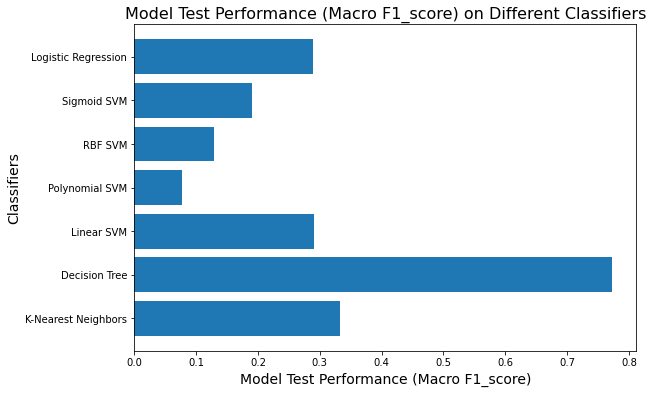

In [74]:
# Baseline - ompare all classifiers
list_clf = []
list_score = []

score_param = "f1_score"
average_param = "macro"

# Generating results
# ---
# Iterate through all classifiers
for clf in dict_clf_default:
    estimator = { clf: dict_clf_default[clf] }
    try:
        score = train_and_evaluate(estimator, x_train, x_test, y_train, y_test)
        
    except Exception as e:
        error_class_name = e.__class__.__name__
        print("{}: {}\n".format(error_class_name, e))
        continue
        
    print()
    
    list_clf.append(clf)
    list_score = list_score + list(score[clf].values())

    
# Create data frame
# ---
data = dict(classifier=list_clf, test_performance=list_score)
df_performance = pd.DataFrame(data=data)

# # Save and export df_performance to CSV file (optional)
# df_performance.to_csv(r'final_project_performance_default.csv', index = False, header = True)


# Plotting
# ---
str_x_label = "Model Test Performance ({} {})".format(average_param.capitalize(), score_param.capitalize())
font_size = 12

plt.figure(figsize=(9, 6))
plt.barh(list_clf, list_score)

plt.title("{} on Different Classifiers".format(str_x_label), fontsize=(font_size + 4))
plt.xlabel(str_x_label, fontsize=(font_size + 2))
plt.ylabel("Classifiers", fontsize=(font_size + 2))

plt.show()

# # Save plot into PNG (optional) 
# plt.savefig("final_project_performance_default.png", dpi=300, bbox_inches="tight")

In [75]:
print(list_score)

[0.3328694504027031, 0.7732013528151364, 0.28999620745631893, 0.076986076986077, 0.12849007997851544, 0.190161022925736, 0.2890112772095463]


## 3.1 Bagging

Recall the definition of `dict_clf_default` from the [earlier section](#3.0-Default-Classifiers).

In [76]:
_ = [print("Index: {} - {}".format(i, clf)) for i, clf in enumerate(dict_clf_default.keys())]

Index: 0 - K-Nearest Neighbors
Index: 1 - Decision Tree
Index: 2 - Linear SVM
Index: 3 - Polynomial SVM
Index: 4 - RBF SVM
Index: 5 - Sigmoid SVM
Index: 6 - Logistic Regression


Specify the `clf_index` from 0 - 6 as a base classifier in bagging approach, each corresponding to the classifier defined in `dict_clf_default`.

In [77]:
# Specify classifier
clf_index = 1    # Accepts value from 0 - 6

# Define parameter values for BaggingClassifier object
base = list(dict_clf_default.values())[clf_index]
bagging_param = dict(base_estimator=base,
                     n_estimators=100,    # create 100 different models using the same `base_estimator`
                     random_state=0)

# Define BaggingClassifier object
model_bagging = BaggingClassifier(**bagging_param)

estimator_name = "Bagging - {}".format(list(dict_clf_default.keys())[clf_index])
estimator = {estimator_name: model_bagging}

# Train and evaluate the performance of the bagging classifier
train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation Bagging - Decision Tree) = 0.8152
f1_macro (Test Bagging - Decision Tree) = 0.8090
[[1075    2   25]
 [   4  182    3]
 [  88    1   60]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1102
           1       0.98      0.96      0.97       189
           2       0.68      0.40      0.51       149

    accuracy                           0.91      1440
   macro avg       0.86      0.78      0.81      1440
weighted avg       0.90      0.91      0.91      1440




{'Bagging - Decision Tree': {'f1_macro': 0.8090483781836065}}

Generate test performance result for all the classifiers as specified.

f1_macro (Validation K-Nearest Neighbors) = 0.3358
f1_macro (Test K-Nearest Neighbors) = 0.3292
[[1059   34    9]
 [ 176   10    3]
 [ 139    6    4]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1102
           1       0.20      0.05      0.08       189
           2       0.25      0.03      0.05       149

    accuracy                           0.75      1440
   macro avg       0.41      0.35      0.33      1440
weighted avg       0.64      0.75      0.67      1440



f1_macro (Validation Decision Tree) = 0.8152
f1_macro (Test Decision Tree) = 0.8090
[[1075    2   25]
 [   4  182    3]
 [  88    1   60]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1102
           1       0.98      0.96      0.97       189
           2       0.68      0.40      0.51       149

    accuracy                           0.91      1440
   macro avg       0.86      0.78      0.81      1440
w

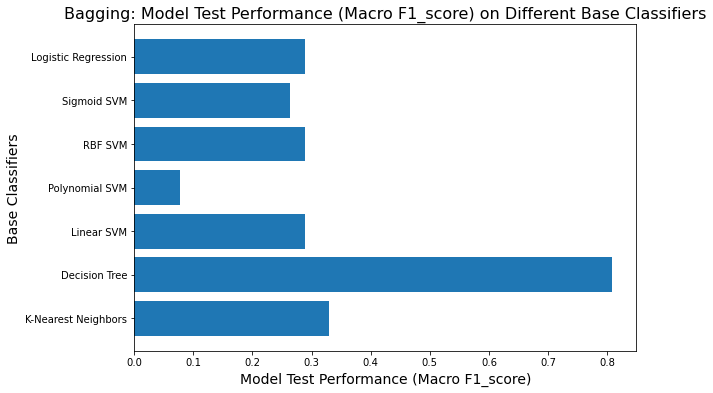

In [78]:
# Bagging - compare all classifiers
list_clf = []
list_score = []

score_param = "f1_score"
average_param = "macro"

bagging_param = dict(n_estimators=100, random_state=0)


# Generate results
# ---
# Iterate through all classifiers
for i, clf in enumerate(dict_clf_default):
    base = dict_clf_default[clf]
    
    params = bagging_param.copy()
    params["base_estimator"] = base

    model_bagging = BaggingClassifier(**params)
    
    estimator = { clf: model_bagging }
    
    try:
        score = train_and_evaluate(estimator, x_train, x_test, y_train, y_test)
        
    except Exception as e:
        error_class_name = e.__class__.__name__
        print("{}: {}\n".format(error_class_name, e))
        continue
    
    print()
    
    list_clf.append(clf)
    list_score = list_score + list(score[clf].values())

    
# Create data frame
# ---
data = dict(classifier=list_clf, test_performance=list_score)
df_performance = pd.DataFrame(data=data)

# # Save and export df_performance to CSV file (optional)
# df_performance.to_csv(r'final_project_performance_bagging.csv', index = False, header = True)


# Plotting
# ---
str_x_label = "Model Test Performance ({} {})".format(average_param.capitalize(), score_param.capitalize())
font_size = 12

plt.figure(figsize=(9, 6))
plt.barh(list_clf, list_score)

plt.title("Bagging: {} on Different Base Classifiers".format(str_x_label), fontsize=(font_size + 4))
plt.xlabel(str_x_label, fontsize=(font_size + 2))
plt.ylabel("Base Classifiers", fontsize=(font_size + 2))

plt.show()

# # Save plot into PNG (optional) 
# plt.savefig("final_project_performance_bagging.png", dpi=300, bbox_inches="tight")

## 3.2 Boosting

Recall the definition of `dict_clf_default` from the [earlier section](#3.0-Default-Classifiers).

In [79]:
_ = [print("Index: {} - {}".format(i, clf)) for i, clf in enumerate(dict_clf_default)]

Index: 0 - K-Nearest Neighbors
Index: 1 - Decision Tree
Index: 2 - Linear SVM
Index: 3 - Polynomial SVM
Index: 4 - RBF SVM
Index: 5 - Sigmoid SVM
Index: 6 - Logistic Regression


Specify the `clf_index` from 0 - 6 as a base classifier in AdaBoost approach, each corresponding to the classifier defined in `dict_clf_default`.

In [80]:
# Specify one classifier
clf_index = 1    # Accepts value from 0 - 6

# Define parameter values for AdaBoostClassifier object
base = list(dict_clf_default.values())[clf_index]
boosting_param = dict(base_estimator=base,
                     n_estimators=100,
                     random_state=0)

# Define AdaBoostClassifier object
model_boosting = AdaBoostClassifier(**boosting_param)

estimator_name = "Boosting - {}".format(list(dict_clf_default.keys())[clf_index])
estimator = {estimator_name: model_boosting}

# Train and evaluate the performance of the AdaBoost classifier
train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_macro (Validation Boosting - Decision Tree) = 0.7783
f1_macro (Test Boosting - Decision Tree) = 0.7786
[[1035   18   49]
 [   4  180    5]
 [  79    5   65]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1102
           1       0.89      0.95      0.92       189
           2       0.55      0.44      0.49       149

    accuracy                           0.89      1440
   macro avg       0.79      0.78      0.78      1440
weighted avg       0.88      0.89      0.88      1440




{'Boosting - Decision Tree': {'f1_macro': 0.7786248020789598}}

Generate test performance result for all classifiers as specified.

- K-Nearest Neighbors
f1_macro (Validation K-Nearest Neighbors) = nan
ValueError: KNeighborsClassifier doesn't support sample_weight.

- Decision Tree
f1_macro (Validation Decision Tree) = 0.7783
f1_macro (Test Decision Tree) = 0.7786
[[1035   18   49]
 [   4  180    5]
 [  79    5   65]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1102
           1       0.89      0.95      0.92       189
           2       0.55      0.44      0.49       149

    accuracy                           0.89      1440
   macro avg       0.79      0.78      0.78      1440
weighted avg       0.88      0.89      0.88      1440



- Linear SVM
f1_macro (Validation Linear SVM) = nan
TypeError: AdaBoostClassifier with algorithm='SAMME.R' requires that the weak learner supports the calculation of class probabilities with a predict_proba method.
Please change the base estimator or set algorithm='SAMME' instead.

- Polynomial SVM
f1_macro (Validation Polyno

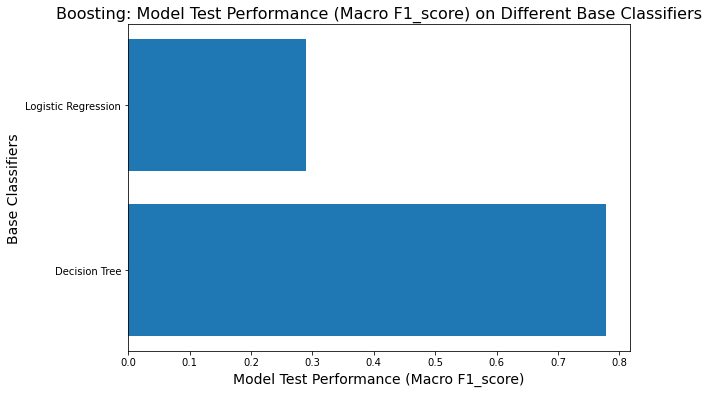

In [81]:
# Compare all classifiers
list_clf = []
list_score = []

score_param = "f1_score"
average_param = "macro"

feature_train = x_train
feature_test = x_test

# Initialize parameter values of boosting classifier
boosting_param = dict(n_estimators=100, random_state=0)

# Loop through all classifiers
# ---
for i, clf in enumerate(dict_clf_default):
    print("- {}".format(clf))
    base = dict_clf_default[clf]
    
    params = boosting_param.copy()
    params["base_estimator"] = base
    
    model_boosting = AdaBoostClassifier(**params)
    
    estimator = { clf: model_boosting }
    
    try:
        score = train_and_evaluate(estimator, x_train, x_test, y_train, y_test)
    
    except Exception as e:
        error_class_name = e.__class__.__name__
        print("{}: {}\n".format(error_class_name, e))
        continue
    
    print()
    
    list_clf.append(clf)
    list_score = list_score + list(score[clf].values())
    
    
# Create data frame
# ---
data = dict(classifier=list_clf, test_performance=list_score)
df_performance = pd.DataFrame(data=data)

# # Save and export df_performance to CSV file
# df_performance.to_csv(r'final_project_performance_boosting.csv', index = False, header = True)

# Plotting
# ---
str_x_label = "Model Test Performance ({} {})".format(average_param.capitalize(), score_param.capitalize())
font_size = 12

plt.figure(figsize=(9, 6))
plt.barh(list_clf, list_score)

plt.title("Boosting: {} on Different Base Classifiers".format(str_x_label), fontsize=(font_size + 4))
plt.xlabel(str_x_label, fontsize=(font_size + 2))
plt.ylabel("Base Classifiers", fontsize=(font_size + 2))

plt.show()

# # Save plot into PNG (optional) 
# plt.savefig("final_project_performance_boosting.png", dpi=300, bbox_inches="tight")

**Note**: The comparison for Boosting method is done only between Decision Tree and Logistic Regression because KNN and default SVM classifiers cannot be specified as the base estimator for sklearn's `AdaBoostClassifier`.

## 3.3 Voting 

Voting is a method involving different machine learning algorithms.

To implement voting method, specify `num_base_clf`, the number of base classifiers when defining an object of `VotingClassifier()`.

In [82]:
score_param = "f1_score"
average_param = "macro"

# specify number of base classifiers
num_base_clf = 3                                # Accepts values from 2 - 4 (number of base classifiers)
list_clf = [[] for i in range(num_base_clf)]    # 2-dimensional list, to store list of classifiers in
                                                # each voting classifier
list_score = []

# Generate all possible combinations of base classifiers with # of classifiers = num_base_clf
# ---
# For example: if num_base_clf = 3, 
# [A, B, C, D] -> [A, B, C], [A, B, D], [A, C, D] and [B, C, D]
combinations_base_clf = itertools.combinations(dict_clf_default, num_base_clf)

# Iterate through all generated lists
for comb in combinations_base_clf:
    list_base_clf = []
    
    # Return number of SVM classifiers in a list
    count_svm = sum("SVM" in clf for clf in comb)    
    
    # At most one SVM classifier in the list.
    # - skip all the lists with >1 classifiers - speed up iteration
    # - ensure variation in machine learning algorithms in the voting classifier
    if count_svm <= 1:
        for i, clf in enumerate(comb):
            list_base_clf.append((clf, dict_clf_default[clf]))
            list_clf[i].append(clf)
    
        print(comb)
        print("---")
        
        try:
            model_voting = VotingClassifier(estimators=list_base_clf)
            
            estimator_name = "Voting Classifier"
            estimator = { estimator_name : model_voting }
            score = train_and_evaluate(estimator, x_train, x_test, y_train, y_test)
            
            list_score = list_score + list(score[estimator_name].values())
            
        except Exception as e:
            error_class_name = e.__class__.__name__
            print("{}: {}\n".format(error_class_name, e))
            continue
        
        print()

        
# Create data frame
# ---
data = dict()
for i, base_clf in enumerate(list_clf):
    clf_key = "classifier_{}".format(i)
    data[clf_key] = base_clf

data["test_performance"] = list_score
df_performance = pd.DataFrame(data=data)

# Save and export df_performance to CSV file (optional)
df_performance.to_csv(r'final_project_performance_voting_{}clf.csv'.format(num_base_clf), index = False, header = True)

df_performance

('K-Nearest Neighbors', 'Decision Tree', 'Linear SVM')
---
f1_macro (Validation Voting Classifier) = 0.4003
f1_macro (Test Voting Classifier) = 0.3423
[[1093    3    6]
 [ 178   11    0]
 [ 145    0    4]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      1102
           1       0.79      0.06      0.11       189
           2       0.40      0.03      0.05       149

    accuracy                           0.77      1440
   macro avg       0.65      0.36      0.34      1440
weighted avg       0.74      0.77      0.68      1440



('K-Nearest Neighbors', 'Decision Tree', 'Polynomial SVM')
---
f1_macro (Validation Voting Classifier) = 0.4770
f1_macro (Test Voting Classifier) = 0.6034
[[1058   43    1]
 [   9  180    0]
 [ 136   10    3]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1102
           1       0.77      0.95      0.85       189
           2       0.75      0.02     

,classifier_0,classifier_1,classifier_2,test_performance
0,K-Nearest Neighbors,Decision Tree,Linear SVM,0.342279
1,K-Nearest Neighbors,Decision Tree,Polynomial SVM,0.603434
2,K-Nearest Neighbors,Decision Tree,RBF SVM,0.469199
3,K-Nearest Neighbors,Decision Tree,Sigmoid SVM,0.461199
4,K-Nearest Neighbors,Decision Tree,Logistic Regression,0.336290
5,K-Nearest Neighbors,Linear SVM,Logistic Regression,0.288863
6,K-Nearest Neighbors,Polynomial SVM,Logistic Regression,0.317549
7,K-Nearest Neighbors,RBF SVM,Logistic Regression,0.304613
8,K-Nearest Neighbors,Sigmoid SVM,Logistic Regression,0.304613
9,Decision Tree,Linear SVM,Logistic Regression,0.296304


## Experiment Set 3 Summary

The best model from this experiment is obtained using **BaggingClassifier** with default **decision tree** (`random_state=0`) as the base estimator.

    Base estimator (base): DecisionTreeClassifier(random_state=0)

    Ensemble learning method: BaggingClassifier(base_estimator=base, n_estimators=100, random_state=0)
    
    Test performance (macro average F1 score): 0.8090

# Experiment Set 4: Vary Training Sample Size

In this experiment set, we identify the best performing model from the previous experiment sets, namely:

- Experiment Set 1: Decision tree classifier with the best parameter
- Experiment Set 2: Decision tree trained using set of 10 features obtained using chi-squared
- Experiment Set 3: Bagging classifier with decision tree as the base estimator

Then, we generate 10 subsamples from the original training set to test the effect of varying training sample size to each of the best models from the list above.

In [83]:
# Generate 9+1 subsamples from the original training set.
num_subsamples = 10

# Define lists to store subsamples from original training set (features and target)
x_train_subs = []
y_train_subs = []

# Iterate through 9 (=10-1) times to generate 9 smaller training sets
# - `train_size` must be float values between 0 and 1 (exclusive)
# - `random_state=0`: to control the split, so that the smaller subsample is always a subset of 
#   the larger subsample
for k in range(num_subsamples - 1):
    x_train_sub, _, y_train_sub, _ = train_test_split(x_train, y_train, 
                                                      train_size=((k+1) / 10),    # 0.1, 0.2, ..., 0.9
                                                      random_state=0)
    
    # Append subsamples into lists of subsamples
    x_train_subs.append(x_train_sub)
    y_train_subs.append(y_train_sub)
    
# Append full training sample into list of subsamples 
x_train_subs.append(x_train)
y_train_subs.append(y_train)

Define helper function to train and evaluate model performance using **a list of training samples**, instead of one set of training sample as specified in helper function \#1. 

In [84]:
# Helper function #8
def train_and_evaluate_vary_size(estimator, x_train_list, x_test, y_train_list, y_test):
    # Train and evaluate
    # ---
    # Initialize 3 empty lists to store the values of k, validation and test score 
    # Initialize 1 empty dictionary (scores) to store the k: validation_score / test_score (key:value) pairs
    K = [] 
    validationf1macro = []
    testf1macro = []
    scores = {}
    
    for k, (x_train, y_train) in enumerate(zip(x_train_list, y_train_list)):
        # 10-fold Cross-Validation
        # ---
        # Compute the validation score for the model using 10-fold cross validation 
        scores_val = cross_val_score(estimator, x_train, y_train, cv = 10, scoring = 'f1_macro')

        # Compute the mean validation score
        score_val_mean = scores_val.mean()
        
        
        # Training and testing
        # ---
        # Fit and train the model to the subsample training data.
        estimator.fit(x_train, y_train)

        # Compute the test score by compare the actual and prediction outcome.
        test_predict = estimator.predict(x_test)

        # Compute the test score by compare the actual and prediction outcome.
        score_test = metrics.f1_score(y_test, test_predict, average='macro')
        
        
        # Update lists
        # ---
        key = k + 1
        K.append(key)

        validationf1macro.append(score_val_mean)
        testf1macro.append(score_test)

        # A dictionary holds key: value pairs and Store the validation score for each value of k
        scores[key] = (score_val_mean, score_test)


    # Print result
    print("Subsample (%): Macro F1 score (Validation | Test)")

    for key_score in scores:
        score_val = scores[key_score][0]
        score_test = scores[key_score][1]
        print("{:.1f}%: ({:.4f} | {:.4f})".format(key_score*10, score_val, score_test))

## 4.1: Best Model from Experiment Set 1

Decision tree classifier with the best parameter ([summary](#Experiment-Set-1-Summary))

In [85]:
# Define Decision Tree classifier
dtree = DecisionTreeClassifier(criterion = 'gini',splitter = 'best', random_state = 0)

train_and_evaluate_vary_size(dtree, x_train_subs, x_test, y_train_subs, y_test)

Subsample (%): Macro F1 score (Validation | Test)
10.0%: (0.7223 | 0.7347)
20.0%: (0.7465 | 0.7508)
30.0%: (0.7658 | 0.7499)
40.0%: (0.7678 | 0.7449)
50.0%: (0.7430 | 0.7449)
60.0%: (0.7744 | 0.7692)
70.0%: (0.7776 | 0.7757)
80.0%: (0.7815 | 0.7700)
90.0%: (0.7771 | 0.7692)
100.0%: (0.7764 | 0.7732)


## 4.2: Best Model from Experiment Set 2

Decision tree trained using set of 10 features obtained using chi-squared  ([summary](#Experiment-Set-2-Summary))

**Note**: Use helper function `get_chi2_features()` to get the best set of features before generating 10 subsamples from the training sets.

In [86]:
cols = get_chi2_features(x_train, y_train, num_k=10)

x_train_chi2 = x_train[cols]
x_test_chi2 = x_test[cols]

x_train_sub_chi2 = []
for k in range(num_subsamples - 1):
    x_train_sub, _, _, _ = train_test_split(x_train_chi2, y_train,           
                                            train_size=((k+1) / 10),
                                            random_state=0)
    x_train_sub_chi2.append(x_train_sub)
#     y_train_subs.append(y_train_sub)
    
x_train_sub_chi2.append(x_train_chi2)
# y_train_subs.append(y_train)

In [87]:
# Training and evaluating using top 10 features - chi2
dtree = DecisionTreeClassifier(random_state=0)

train_and_evaluate_vary_size(dtree, x_train_sub_chi2, x_test_chi2, y_train_subs, y_test)

Subsample (%): Macro F1 score (Validation | Test)
10.0%: (0.7135 | 0.7364)
20.0%: (0.7405 | 0.7683)
30.0%: (0.7774 | 0.7508)
40.0%: (0.7534 | 0.7686)
50.0%: (0.7401 | 0.7508)
60.0%: (0.7683 | 0.7861)
70.0%: (0.7803 | 0.7797)
80.0%: (0.7852 | 0.7694)
90.0%: (0.7789 | 0.7753)
100.0%: (0.7763 | 0.7881)


## 4.3: Best Model from Experiment Set 3

Bagging classifier with decision tree as the base estimator ([summary](#Experiment-Set-3-Summary))

In [88]:
# #Import the package for Bagging Classifier
# from sklearn.ensemble import BaggingClassifier

model_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0), 
                                  n_estimators=100, random_state=0)

train_and_evaluate_vary_size(model_bagging, x_train_subs, x_test, y_train_subs, y_test)

Subsample (%): Macro F1 score (Validation | Test)
10.0%: (0.7515 | 0.7899)
20.0%: (0.7898 | 0.8064)
30.0%: (0.8087 | 0.7952)
40.0%: (0.8044 | 0.8088)
50.0%: (0.8097 | 0.8167)
60.0%: (0.8079 | 0.8135)
70.0%: (0.8095 | 0.8132)
80.0%: (0.8119 | 0.8179)
90.0%: (0.8144 | 0.8031)
100.0%: (0.8152 | 0.8090)


## Experiment Set 4 summary

The overall best model throughout the experiment is the Bagging model obtained from **Experiment Set 3**.

    Base estimator (base): DecisionTreeClassifier(random_state=0)

    Ensemble learning method: BaggingClassifier(base_estimator=base, n_estimators=100, random_state=0)
    
    Test performance (macro average F1 score): 0.8090

In general, a larger training size yields a better test performance. This can be observed from the test performance of all models in this experiment set. Notably, the test performance does not follow a non-decreasing trend.

**Other findings**

There is a drop for decision tree and decision tree (chi-squared features selection) classifier when come to 50% subsample size.
- Some outliers exists in the 50% subsample which causing the drop of the performance of macro F1.
- Bagging classifier able to overcome this issue
